*AER 850: Project 1*
*Reva Chaudhary*
*501016278*
**STEP 1**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#import Data
df = pd.read_csv('Project_1_Data.csv')

df.head()

,X,Y,Z,Step
0,9.375,3.0625,0.50,1
1,9.375,3.0625,0.51,1
2,9.375,3.0625,0.52,1
3,9.375,3.0625,0.53,1
4,9.375,3.0625,0.54,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       860 non-null    float64
 1   Y       860 non-null    float64
 2   Z       860 non-null    float64
 3   Step    860 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 27.0 KB


**STEP 2**

In [12]:
df.describe()

,X,Y,Z,Step
count,860.000000,860.000000,860.000000,860.000000
mean,5.587116,4.845605,1.197465,7.756977
std,3.719067,1.142329,0.522844,2.407837
min,0.000000,3.062500,0.000000,1.000000
25%,1.562500,3.062500,0.783800,7.000000
50%,7.770000,5.125000,1.220000,8.000000
75%,8.575000,5.845000,1.616975,9.000000
max,9.375000,5.845000,2.350000,13.000000


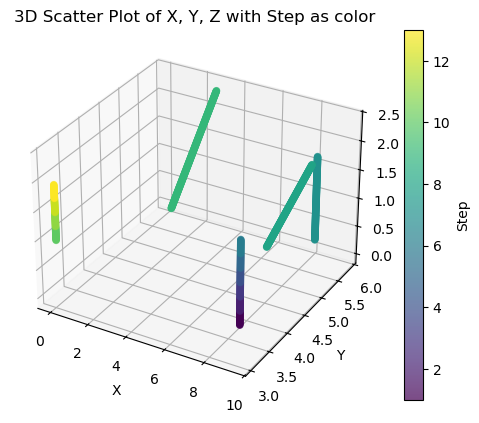

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with X, Y, Z and color based on Step
sc = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Step'], cmap='viridis', alpha=0.7)

# Add a color bar to represent the 'Step' values
plt.colorbar(sc, label='Step')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Scatter Plot of X, Y, Z with Step as color')

# Show plot
plt.show()


Splitting data into train and test datasets using stratified sampling. 80% data will be used for training and other 20% will be used for testing the accuracy of the trained model.

In [5]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

spltiingIndexGenerator = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2432)
for trainIndex, testIndex in spltiingIndexGenerator.split(df, df['Step']):
    train = df.loc[trainIndex]
    test = df.loc[testIndex]

**STEP 3**

Now visualizing the training dataset, manipulate if necessary and check for missing data. Then create corrolation matrix for verifying the corrolation of the dataset.

<Axes: xlabel='Z'>

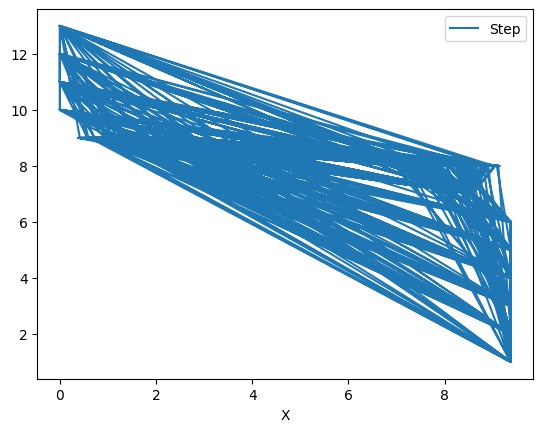

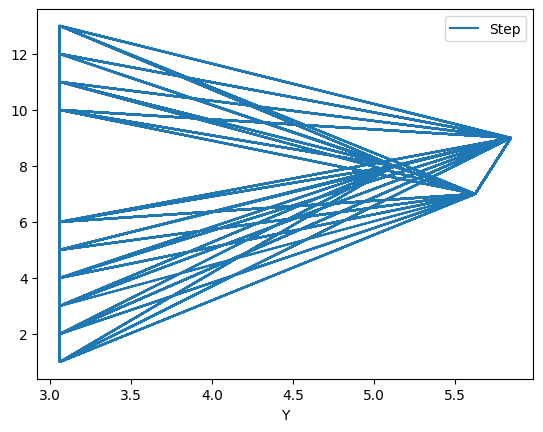

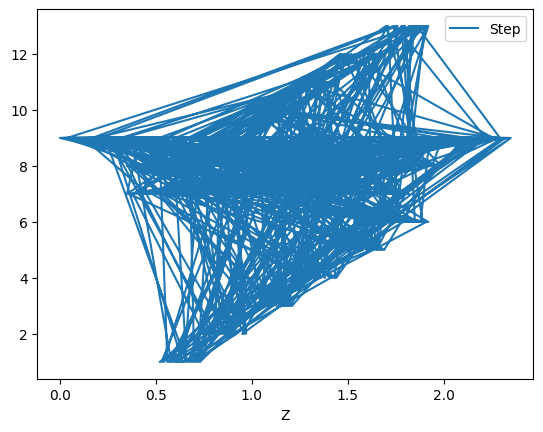

In [6]:
train.plot(x="X", y='Step')
train.plot(x="Y", y='Step')
train.plot(x="Z", y='Step')

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>],
       [<Axes: title={'center': 'Z'}>, <Axes: title={'center': 'Step'}>]],
      dtype=object)

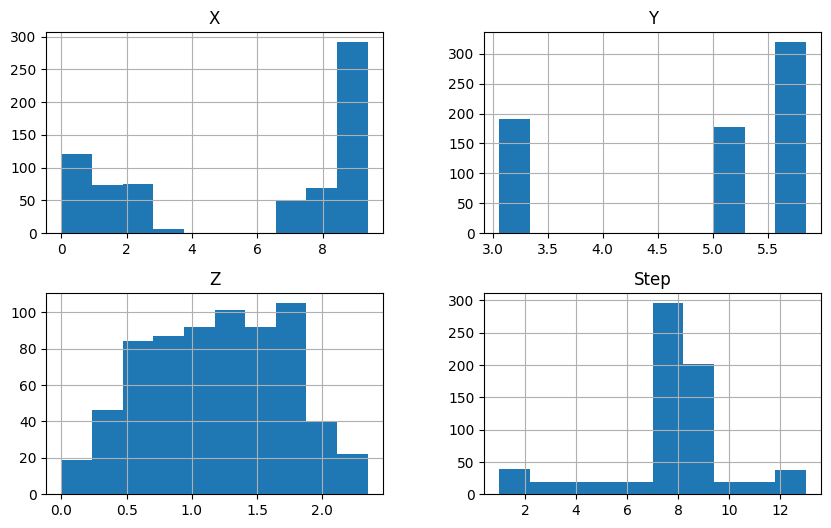

In [7]:
train.hist(figsize=(10,6))

In [8]:
#To see if we have missing data in the data frame
np.where(pd.isnull(train))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
train.corr()

,X,Y,Z,Step
X,1.000000,-0.142673,0.004270,-0.749696
Y,-0.142673,1.000000,-0.127917,0.296774
Z,0.004270,-0.127917,1.000000,0.200815
Step,-0.749696,0.296774,0.200815,1.000000


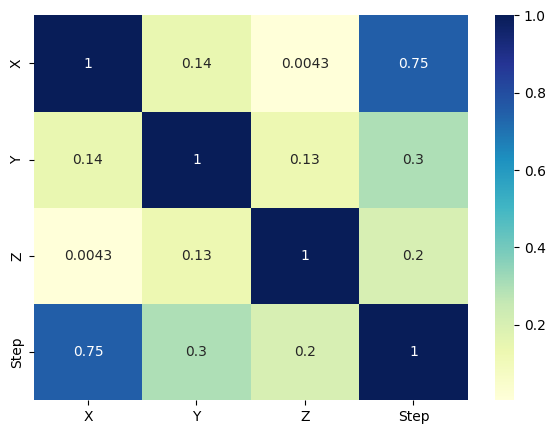

In [10]:
corrMatrix = train.corr()
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(corrMatrix), cmap='YlGnBu', annot = True, fmt=".2g")
plt.show()

In [11]:
abs(corrMatrix['Step']).sort_values()

,Step
Z,0.200815
Y,0.296774
X,0.749696
Step,1.000000


**STEP 4**

Mentioning data as X and y for ML model

In [12]:
#Creating numerical data

selectedCols = ['X', 'Y','Z']
y_train = train['Step']
x_train = train[selectedCols]

y_test = test['Step']
x_test = test[selectedCols]

Testing differant Classifier and evaluting its performance

1. Testing Support Vector Machine and evaluting its performance

In [13]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm
Support_Vector_Machine = svm.SVC()
Support_Vector_Machine.fit(x_train, y_train)
y_pred = Support_Vector_Machine.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(Support_Vector_Machine, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           2       4
102          2       5
522          9       9
775         10      10
After cross validation, accuracy are [0.9        0.81222707 0.92576419]


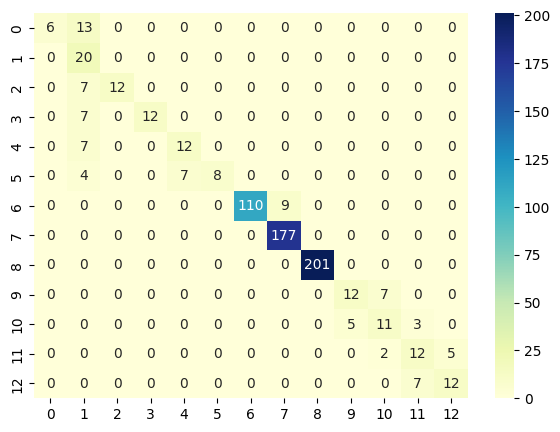

Precision Score :  0.8027106683183093
Recall Score :  0.6945871465995306
f1 Score :  0.7064681693982102


In [14]:
y_train_pred = cross_val_predict(Support_Vector_Machine, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro'))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [15]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.32      0.48        19
           2       0.34      1.00      0.51        20
           3       1.00      0.63      0.77        19
           4       1.00      0.63      0.77        19
           5       0.63      0.63      0.63        19
           6       1.00      0.42      0.59        19
           7       1.00      0.92      0.96       119
           8       0.95      1.00      0.98       177
           9       1.00      1.00      1.00       201
          10       0.71      0.63      0.67        19
          11       0.55      0.58      0.56        19
          12       0.55      0.63      0.59        19
          13       0.71      0.63      0.67        19

    accuracy                           0.88       688
   macro avg       0.80      0.69      0.71       688
weighted avg       0.92      0.88      0.88       688



2. Testing Linear Support Vector Machine and evaluting its performance

In [16]:
lin_clf = svm.LinearSVC(max_iter=10000)
lin_clf.fit(x_train, y_train)
y_pred = lin_clf.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(lin_clf, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           5       4
102          5       5
522          9       9
775         10      10
After cross validation, accuracy are [0.89130435 0.83842795 0.86462882]


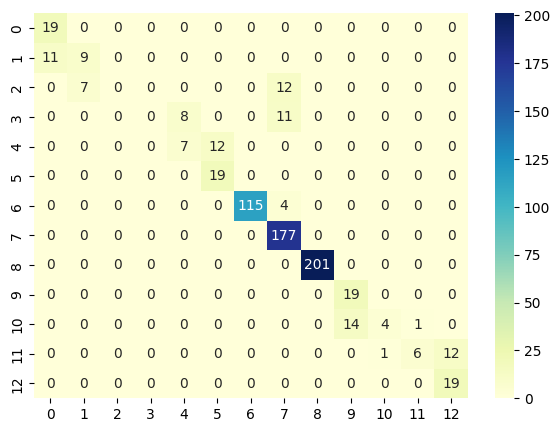

Precision Score :  0.6145272264105281
Recall Score :  0.639317184363624
f1 Score :  0.58807352129067


In [17]:
y_train_pred = cross_val_predict(lin_clf, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro',zero_division=0))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [18]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.63      1.00      0.78        19
           2       0.56      0.45      0.50        20
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        19
           5       0.47      0.37      0.41        19
           6       0.61      1.00      0.76        19
           7       1.00      0.97      0.98       119
           8       0.87      1.00      0.93       177
           9       1.00      1.00      1.00       201
          10       0.58      1.00      0.73        19
          11       0.80      0.21      0.33        19
          12       0.86      0.32      0.46        19
          13       0.61      1.00      0.76        19

    accuracy                           0.86       688
   macro avg       0.61      0.64      0.59       688
weighted avg       0.83      0.86      0.83       688



3. Testing Decision Tree Classifier and evaluting its performance

In [19]:
from sklearn import tree
Decision_Tree_Classifier = tree.DecisionTreeClassifier()
Decision_Tree_Classifier.fit(x_train, y_train)
y_pred = Decision_Tree_Classifier.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(Decision_Tree_Classifier, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           4       4
102          5       5
522          9       9
775         10      10
After cross validation, accuracy are [0.97826087 0.99126638 0.98253275]


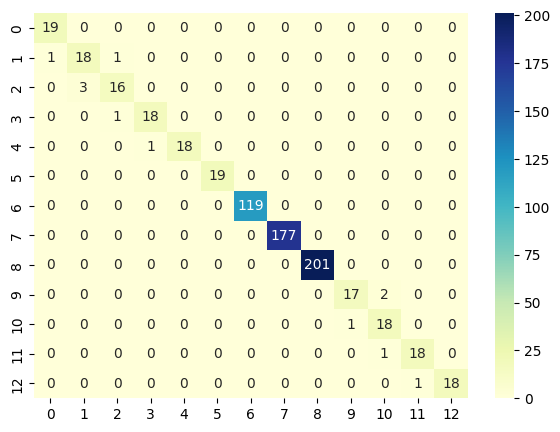

Precision Score :  0.9532581453634085
Recall Score :  0.9518218623481782
f1 Score :  0.952067255898598


In [20]:
y_train_pred = cross_val_predict(Decision_Tree_Classifier, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro'))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [21]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.86      0.90      0.88        20
           3       0.89      0.84      0.86        19
           4       0.95      0.95      0.95        19
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00       119
           8       1.00      1.00      1.00       177
           9       1.00      1.00      1.00       201
          10       0.94      0.89      0.92        19
          11       0.86      0.95      0.90        19
          12       0.95      0.95      0.95        19
          13       1.00      0.95      0.97        19

    accuracy                           0.98       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.98      0.98      0.98       688



4. Testing Multi-layer Perceptron classifier and evaluting its performance

In [22]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(solver='lbfgs', max_iter=500, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
MLP_clf.fit(x_train, y_train)
y_pred = MLP_clf.predict(x_test)

print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(MLP_clf, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           3       4
102          3       5
522          9       9
775          9      10
After cross validation, accuracy are [0.69130435 0.64628821 0.64628821]


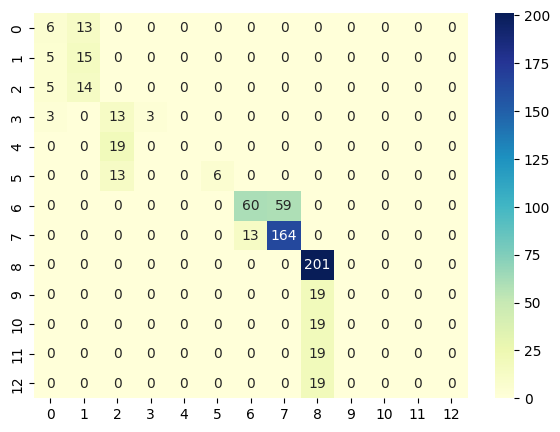

Precision Score :  0.3812236859206095
Recall Score :  0.3054022336307061
f1 Score :  0.29526091525029513


In [23]:
y_train_pred = cross_val_predict(MLP_clf, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro', zero_division=0))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [24]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.32      0.32      0.32        19
           2       0.36      0.75      0.48        20
           3       0.00      0.00      0.00        19
           4       1.00      0.16      0.27        19
           5       0.00      0.00      0.00        19
           6       1.00      0.32      0.48        19
           7       0.82      0.50      0.62       119
           8       0.74      0.93      0.82       177
           9       0.73      1.00      0.84       201
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        19

    accuracy                           0.66       688
   macro avg       0.38      0.31      0.30       688
weighted avg       0.62      0.66      0.61       688



5. Testing k-nearest neighbors algorithm and evaluting its performance

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(knn, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           4       4
102          5       5
522          9       9
775         10      10
After cross validation, accuracy are [0.96521739 0.98689956 0.98253275]


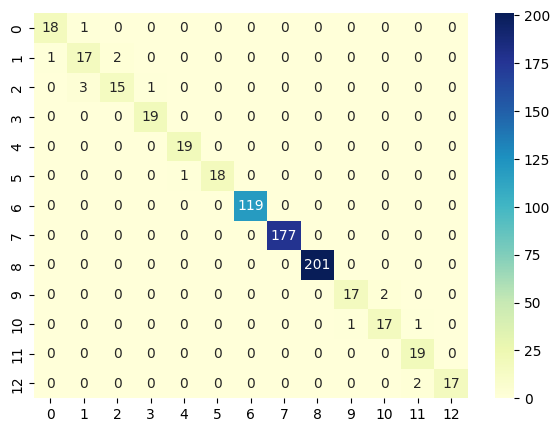

Precision Score :  0.9416971401491525
Recall Score :  0.9398785425101216
f1 Score :  0.9397377263477787


In [26]:
y_train_pred = cross_val_predict(knn, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro'))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [27]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5

    accuracy                           0.99       172
   macro avg       0.99      0.98      0.98       172
weighted avg       1.00      0.99      0.99       172



6. Testing  stochastic gradient descent classifier and evaluting its performance

In [28]:
from sklearn.linear_model import SGDClassifier
SGD_Classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5000)
SGD_Classifier.fit(x_train, y_train)
y_pred = SGD_Classifier.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(SGD_Classifier, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348         12       8
644          9       9
623          9       9
90           1       4
102          6       5
522          9       9
775         10      10
After cross validation, accuracy are [0.67826087 0.68558952 0.5720524 ]


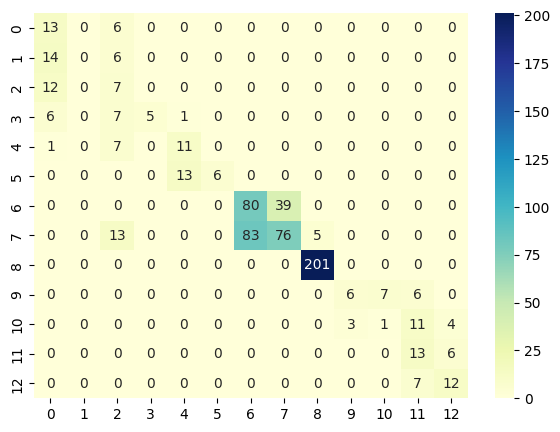

Precision Score :  0.5146654183644372
Recall Score :  0.46126032928782573
f1 Score :  0.43384516708356347


In [29]:
y_train_pred = cross_val_predict(SGD_Classifier, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro', zero_division=0))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [30]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.28      0.68      0.40        19
           2       0.00      0.00      0.00        20
           3       0.15      0.37      0.22        19
           4       1.00      0.26      0.42        19
           5       0.44      0.58      0.50        19
           6       1.00      0.32      0.48        19
           7       0.49      0.67      0.57       119
           8       0.66      0.43      0.52       177
           9       0.98      1.00      0.99       201
          10       0.67      0.32      0.43        19
          11       0.12      0.05      0.07        19
          12       0.35      0.68      0.46        19
          13       0.55      0.63      0.59        19

    accuracy                           0.63       688
   macro avg       0.51      0.46      0.43       688
weighted avg       0.67      0.63      0.62       688



#RandomizedSearchCV

In [ ]:
class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

Randomized_search = RandomizedSearchCV(logistic, distributions, random_state=0)
Randomized_search.fit(x_train, y_train)

SGD_Classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5000)
SGD_Classifier.fit(x_train, y_train)
y_pred = Randomized_search.predict(x_test)


print(pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(7))
print('After cross validation, accuracy are' ,
      cross_val_score(Randomized_search, x_train, y_train, cv=3, scoring="accuracy"))

     Predicted  Actual
348          8       8
644          9       9
623          9       9
90           4       4
102          5       5
522          9       9
775         10      10
After cross validation, accuracy are [0.9        0.81222707 0.8209607 ]


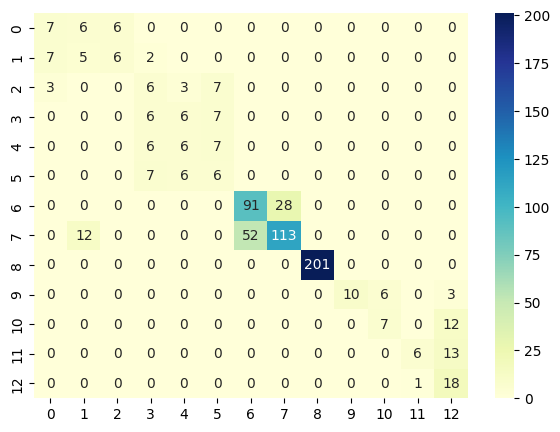

Precision Score :  0.5064619661461031
Recall Score :  0.47129293630579244
f1 Score :  0.4608518660850734


In [35]:
y_train_pred = cross_val_predict(SGD_Classifier, x_train, y_train, cv=3)

confusionMatrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

print("Precision Score : ",metrics.precision_score(y_train, y_train_pred,average='macro', zero_division=0))
print("Recall Score : ",metrics.recall_score(y_train, y_train_pred,average='macro'))
print("f1 Score : ",metrics.f1_score(y_train, y_train_pred,average='macro'))

In [ ]:
print(metrics.classification_report(y_train, y_train_pred, zero_division=0))

**STEP 6**

Decision Tree Classifier and k-nearest neighbors algorithm had best result

**STEP 7**

Save the model for future use.

In [ ]:
import joblib
joblib.dump(Decision_Tree_Classifier, "model.pkl")

['project1_model.pkl']

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



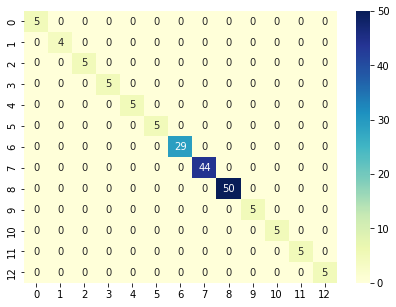

In [ ]:
project1_model = joblib.load("project1_model.pkl")

predictionsTest = project1_model.predict(x_test)
yTest = test['Step']

print(metrics.classification_report(yTest, predictionsTest,  zero_division=0))
#print(pd.DataFrame(data={'Predicted': predictionsTest, 'Actual': yTest}).head(7))

confusionMatrix = metrics.confusion_matrix(yTest, predictionsTest)
plt.figure(figsize = (7,5))
datapltot = sb.heatmap(abs(confusionMatrix), cmap='YlGnBu', annot = True, fmt="d")
plt.show()

predict the corresponding maintenance Steps mention in the project 1.

In [ ]:
# predict the corresponding maintenance Steps

Coordinate1 = [9.375,3.0625,1.51]
Coordinate2 = [6.995,5.125,0.3875]
Coordinate3 = [0,3.0625,1.93]
Coordinate4 = [9.4,3,1.8]
Coordinate5 = [9.4,3,1.3]

# Predict step uning trained model
project1_model = joblib.load("project1_model.pkl")

print('For coordinate', Coordinate1, 'Follow : Step', int(project1_model.predict([Coordinate1])))
print('For coordinate', Coordinate2, 'Follow : Step', int(project1_model.predict([Coordinate2])))
print('For coordinate', Coordinate3, 'Follow : Step', int(project1_model.predict([Coordinate3])))
print('For coordinate', Coordinate4, 'Follow : Step', int(project1_model.predict([Coordinate4])))
print('For coordinate', Coordinate5, 'Follow : Step', int(project1_model.predict([Coordinate5])))

For coordinate [9.375, 3.0625, 1.51] Follow : Step 5
For coordinate [6.995, 5.125, 0.3875] Follow : Step 8
For coordinate [0, 3.0625, 1.93] Follow : Step 13
For coordinate [9.4, 3, 1.8] Follow : Step 6
For coordinate [9.4, 3, 1.3] Follow : Step 4
